# **Section 1 : Google Gemini API**

## **Package Installation**

First we have to install google-generativeai , langchain package for google GenAI and other essential packeages.

In [73]:
! pip install -q --upgrade google-generativeai langchain-google-genai

Let's Import Google's GenAI package

In [74]:
import google.generativeai as genai
from google.colab import userdata

## **Access Gemini Models** ♊
In order to access Google Gemini models, Use Google Gemini API key name which we have already save in Colab.

In [75]:
import os
GOOGLE_API_KEY=userdata.get('gemini')
genai.configure(api_key=GOOGLE_API_KEY)

## **Print Names of Available Gemini Models**

In [76]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## **Let's test Gemini 1.5 Pro Model**

Gemini 1.5 Pro is a Multimodel GenAI model which can handle text as well as image as input.

In [77]:
model = genai.GenerativeModel(model_name = "gemini-1.5-pro-latest")

# Print model
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-latest',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

## **Text Generation**

In [78]:
# Chat with Gemini
response = model.generate_content("Who are you")
print(response.text)

I am a large language model, trained by Google. 

Think of me as a computer program that can understand and generate human-like text. I can answer your questions, write stories, translate languages, and much more. 

However, it's important to remember:

* **I am not a person.** I don't have feelings, opinions, or personal experiences.
* **My knowledge is limited.** I am trained on a massive amount of text data, but my knowledge is only as good as the data I was trained on.
* **I am not always accurate.** I am still under development and learning new things all the time. 

I am here to assist you with your tasks and provide information. How can I help you today? 



## **Image as Input**

In [79]:
# Install Pillow

! pip install pillow

In [80]:
import PIL.Image
from IPython.display import Image

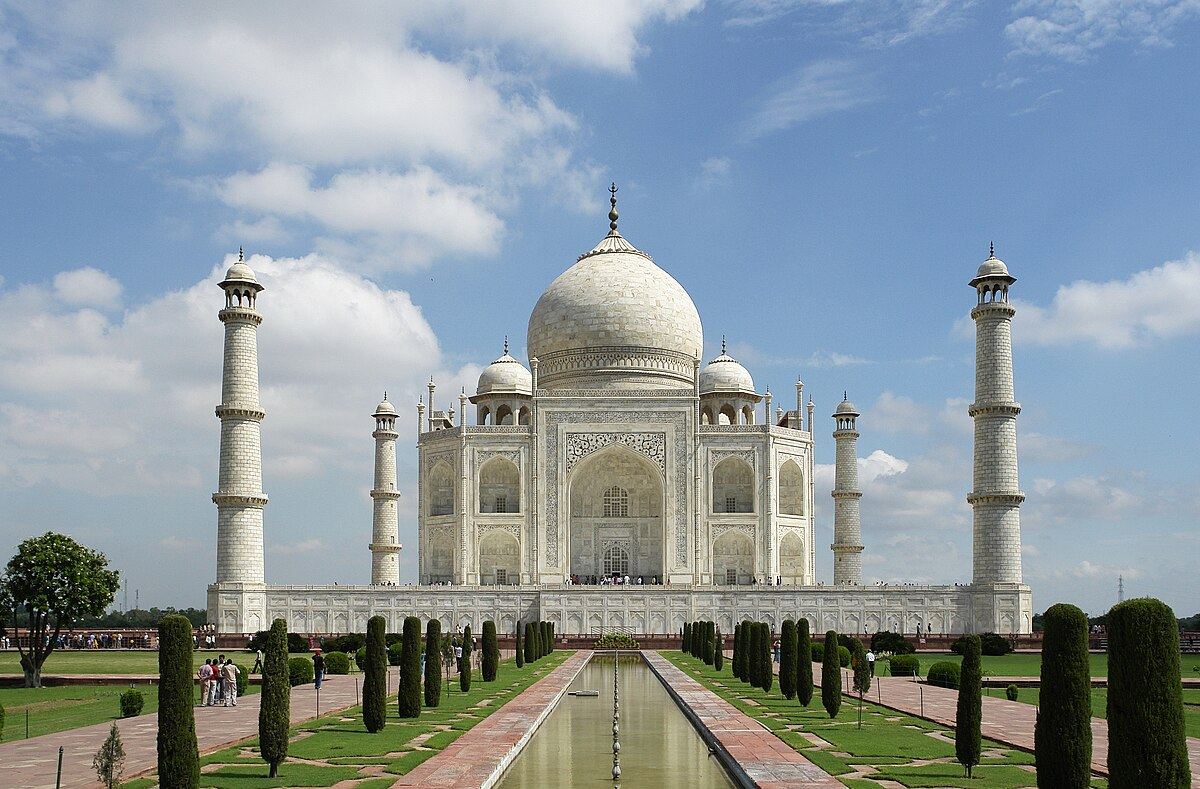

In [81]:
test_image_path = "/content/sample_data/Taj_Mahal.jpeg"
image = PIL.Image.open(test_image_path)
display(image)



In [82]:
# Input the image to Gemini 1.5 Pro model

response = model.generate_content(image)
print(response.text)

The image shows the Taj Mahal, a white marble mausoleum located in Agra, India. It was built by Mughal emperor Shah Jahan in memory of his third wife Mumtaz Mahal. The Taj Mahal is widely recognized as "the jewel of Muslim art in India and one of the universally admired masterpieces of the world's heritage".


# **Section 2 : LangChain Framework**

In this session, we will try out various components in LangChain that are commonly used to build an application with Large Language Models.

LangChain Conceptual Document :  [link](https://python.langchain.com/v0.2/docs/introduction/) <br>
LangChain API Reference : [link](https://js.langchain.com/v0.1/docs/get_started/introduction/)


In this section, let's understand about few LangChain components which we can use to build a Retrival Augmented Generation (RAG) application.

In [83]:
# Install LangChain
!pip install langchain

import langchain

## **1. Model I/O** 🔃

There are 3 important features in Model I/O compoment.



*   AI Model / LLM
*   Prompt
*   Output Parsers

To know more about Model I/O , refer this [page](https://python.langchain.com/v0.1/docs/modules/model_io/)







###   **AI Model** 💻

LangChain offers support to access several Large Language models such as OpenAI's GPT, Google's Gemini, Mistral AI , Antropic etc. through API key.


Note : You can check the list of models supported by LangChain [here](https://python.langchain.com/v0.1/docs/integrations/chat/).


Let's use LangChain's interface to access Gemini 1.5 Pro model.

Advanced : LangChain also supports several Embedding Models. You can find the list of models [here]https://python.langchain.com/v0.1/docs/integrations/text_embedding/)

In [84]:
#Access Gemini 1.5 Pro model with LangChain
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest",google_api_key=GOOGLE_API_KEY,  temperature=0.7, top_p=0.85 )

"""
Temperature:
Governs the randomness and creativity of text.
Lower values = predictable, consistent text.
Higher values = more freedom, creative output.
Default: 1.0 (experiment for different results).
Top_p (Nucleus Sampling):
Limits the number of words considered during generation.
Selects words with high cumulative probability.
Lower values = smaller selection pool, more focused output.
Helps prevent overly diverse or nonsensical text.

"""



'\nTemperature:\nGoverns the randomness and creativity of text.\nLower values = predictable, consistent text.\nHigher values = more freedom, creative output.\nDefault: 1.0 (experiment for different results).\nTop_p (Nucleus Sampling):\nLimits the number of words considered during generation.\nSelects words with high cumulative probability.\nLower values = smaller selection pool, more focused output.\nHelps prevent overly diverse or nonsensical text.\n\n'

Let's ask a question to the LLM model.

In [85]:
my_text = "Which fruit is red in color?"

#llm.invoke(my_text)

###   **Chat Models and Message Types**  🔤


**Chat Messages** <br>
**1. System:** Provides helpful background context and instructions for the AI.<br>
**2. Human:** Represents messages sent by the user.<br>
**3. LLM / AI :** Displays the AI's responses.<br>
Each message type is similar to text but is specifically categorized to indicate its source (System, Human, or AI). This helps in structuring conversations and understanding the flow of interactions between the user and the AI.

In [86]:
from langchain.schema import HumanMessage, SystemMessage, AIMessage
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest",google_api_key=GOOGLE_API_KEY,  temperature=0.7, top_p=0.85)

llm.invoke(
    [
        SystemMessage(content="You are an AI bot that answers user's queries in short and concise manner"),
        HumanMessage(content=my_text)
    ]
)





AIMessage(content='Apple \n', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-610e0a4f-8d7e-4323-b568-c5220069a856-0')

In [87]:
# Use AIMessage from the previous chat to generate more responses
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest",google_api_key=GOOGLE_API_KEY,  temperature=0.7, top_p=0.85)
'''
llm.invoke(
    [
        SystemMessage(content="You are an AI bot that answers user's queries in short and concise manner"),
        HumanMessage(content=my_text),
        AIMessage(content="Strawberry"),
        HumanMessage(content="Suggest more fruits")
    ]
)
'''

'\nllm.invoke(\n    [\n        SystemMessage(content="You are an AI bot that answers user\'s queries in short and concise manner"),\n        HumanMessage(content=my_text),\n        AIMessage(content="Strawberry"),\n        HumanMessage(content="Suggest more fruits")\n    ]\n)\n'

###   **Prompt** ⌨

*   Prompt: Instructions for a language model to generate text.
*   Prompt Template: Predefined recipe for prompts, including instructions, examples, and context.
Note : Checkout [LangSmith Hub](https://smith.langchain.com/hub/search?q=prompt+templates) for many more community prompt templates.

Let's look at few examples using Gemini Model.

In this section we will discuss about 4 basic prompt templates in LangChain ,

*   PromptTemplate
*   ChatPromptTemplate
*   FewShotPromptTemplate
*   PipelinePromptTemplate






In [88]:
# PromptTemplate
from langchain import PromptTemplate

prompt_template_1 = PromptTemplate.from_template(
    "Tell me a {adj} fact about {content} and it must be very {adj}"
) # Template will auto pickup 'adj' and 'content' as input parameters

prompt_1 = prompt_template_1.format(adj="interesting", content="the Eiffel Tower")
print(prompt_1)

#llm.invoke(prompt_1)

Tell me a interesting fact about the Eiffel Tower and it must be very interesting


In [89]:
# Use several strings to contruct a Prompt Template

question_prompt = "Tell me few {content_1} in  {content_2}"
intent_prompt = " that I should know"
ending_prompt = " before I visit {content_2}"

prompt_template_2 = question_prompt + intent_prompt + ending_prompt
prompt_2 =  prompt_template_2.format(content_1="tourist attactions ", content_2="Taiwan")
print(prompt_2)

#llm.invoke(prompt_2)

Tell me few tourist attactions  in  Taiwan that I should know before I visit Taiwan


In [90]:
# ChatPromptTemplate
from langchain.prompts.chat import ChatPromptTemplate
chat_template = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful AI bot. Your name is {name}."),
        ("human", "Hello, how are you doing?"),
        ("ai","'I'm doing well, thanks!"),
        ("human", "{user_input}" ),
    ]
)
messages = chat_template.format_messages(
  name="Moana",
  user_input="What is your name?"
)

print(messages)

#llm.invoke(messages)

[SystemMessage(content='You are a helpful AI bot. Your name is Moana.'), HumanMessage(content='Hello, how are you doing?'), AIMessage(content="'I'm doing well, thanks!"), HumanMessage(content='What is your name?')]


In [91]:
# FewShotPromptTemplate
from langchain.prompts import FewShotPromptTemplate

examples = [
    {"input": "Leaves", "output": "Leaves act as solar panels for plants, capturing sunlight for photosynthesis. "},
]
example_prompt = PromptTemplate.from_template(
  "Word:{input}\nExplanation:{output}"
)

few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Word:{input}",
    input_variables=["input"],
)



print(few_shot_prompt)

#llm.invoke(few_shot_prompt.format(input="Root"))


input_variables=['input'] examples=[{'input': 'Leaves', 'output': 'Leaves act as solar panels for plants, capturing sunlight for photosynthesis. '}] example_prompt=PromptTemplate(input_variables=['input', 'output'], template='Word:{input}\nExplanation:{output}') suffix='Word:{input}'


In [92]:
# PipelinePromptTemplate
from langchain_core.prompts.pipeline import PipelinePromptTemplate

promptA = PromptTemplate.from_template('Project {time}');
promptB = PromptTemplate.from_template('discuss the timeline and Progress of {topic}');
promptC = PromptTemplate.from_template('I think we have to {action}');

pipelinePromptTemplate = PipelinePromptTemplate(
  final_prompt=promptC,
  pipeline_prompts=[
      ('topic', promptA),
      ('action', promptB),
  ],
);

print(pipelinePromptTemplate.format(time='tomorrow morning'))


I think we have to discuss the timeline and Progress of Project tomorrow morning


### **Output Parser** ✅
Format model responses for structured data. <br>
Key Components: <br>
Format Instructions: Guide the model's response format (auto-generated by LangChain). <br>
Parser: Extracts model text into a desired structure (often JSON).

You can find a list of output parsers [here](https://python.langchain.com/v0.1/docs/modules/model_io/output_parsers/).

Let's look at an example.

In [93]:
# CommaSeparatedListOutputParser

from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.chains import LLMChain

output_parser = CommaSeparatedListOutputParser()
template = """List all the colors in a rainbow. The reply should be concise and to the point."""
prompt = PromptTemplate(template=template, input_variables=[], output_parser=output_parser)
llm_chain = LLMChain(prompt=prompt, llm=llm)

llm_chain.predict_and_parse()

/usr/local/lib/python3.10/dist-packages/langchain/chains/llm.py:339: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


['Red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet.']

## **2. Retrival** ♻

LangChain provides all the building Blocks for a RAG (Retrival Augmented Generation) application.

They are


*   Document Loader
*   Text Splitting
*   Text Embedding Model
*   Vector Stores
*   Retrievers








### **Document Loader** 📰

LangChain offers several functions to load documents which can be PDF, CSV, JSON etc.

You can find the list of document loaders [here](https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/).

Let's look at how to load a PDF file.

In [94]:
! pip install pypdf


#Load PDF using pypdf into array of documents, where each document contains the page content and metadata with page number.

! pip install langchain-community

In [95]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/sample_data/attention_is_all_you_need_paper.pdf")
pages = loader.load_and_split()
print(pages[1].page_content)


1 Introduction
Recurrent neural networks, long short-term memory [ 13] and gated recurrent [ 7] neural networks
in particular, have been firmly established as state of the art approaches in sequence modeling and
transduction problems such as language modeling and machine translation [ 35,2,5]. Numerous
efforts have since continued to push the boundaries of recurrent language models and encoder-decoder
architectures [38, 24, 15].
Recurrent models typically factor computation along the symbol positions of the input and output
sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden
states ht, as a function of the previous hidden state ht−1and the input for position t. This inherently
sequential nature precludes parallelization within training examples, which becomes critical at longer
sequence lengths, as memory constraints limit batching across examples. Recent work has achieved
significant improvements in computational efficiency through factor

### **Text Splitter** ✂

**Challenge:** LLMs have limited context window size. Long documents need to be split. <br>
**Text Splitters:** Tools to break down documents into manageable chunks. <br>
**Key Considerations:** <br>
**Semantic Meaning:** Keep related text together (e.g., sentences). <br>
**Chunk Size:** Control the size of each split based on your needs. <br>
**Customization Options:** <br>
**Splitting Method:** Choose how to break up the text (e.g., by sentences).This can be specified using *chuck_overlap* parameter <br>
**Chunk Size Measurement:** Define how to measure chunk size (e.g., word count). This can be specified using *chuck_size* parameter <br>

Different type of text splitters offered by LangChain is listed [here](https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/).

Let's look at an example with a common text splitter ~
**RecursiveCharacterTextSplitter**

In [96]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=1000)
#  chunk_size = Number of charecters



texts = text_splitter.create_documents([pages[1].page_content])
print(texts)
print(texts[1])

[Document(page_content='1 Introduction\nRecurrent neural networks, long short-term memory [ 13] and gated recurrent [ 7] neural networks\nin particular, have been firmly established as state of the art approaches in sequence modeling and\ntransduction problems such as language modeling and machine translation [ 35,2,5]. Numerous\nefforts have since continued to push the boundaries of recurrent language models and encoder-decoder\narchitectures [38, 24, 15].\nRecurrent models typically factor computation along the symbol positions of the input and output\nsequences. Aligning the positions to steps in computation time, they generate a sequence of hidden\nstates ht, as a function of the previous hidden state ht−1and the input for position t. This inherently\nsequential nature precludes parallelization within training examples, which becomes critical at longer\nsequence lengths, as memory constraints limit batching across examples. Recent work has achieved'), Document(page_content='in part

### **Embedding Model** 🧠

**What it is:** A tool to convert text into numerical representations (vectors). <br>
**Why it's useful:** Allows us to analyze text based on meaning (semantics) and perform tasks like semantic search. <br>

In [97]:
!pip install -q torch transformers sentence-transformers faiss-gpu

In [98]:
from langchain_community.embeddings import HuggingFaceEmbeddings



embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-base-en-v1.5")

input_string = "Hello world"

# Generate the embedding vector
embedding_vector = embeddings.embed_query(input_string)

# Print the embedding vector
print(embedding_vector)








[0.010723933577537537, 0.05578320473432541, 0.02708457224071026, 0.0030408655293285847, 0.030335726216435432, 0.0204800795763731, 0.031328074634075165, 0.04103880003094673, -0.025208402425050735, -0.057271748781204224, -0.003961396869271994, -0.004360188730061054, -0.06811589747667313, 0.019529027864336967, 0.016956135630607605, 0.028180856257677078, 0.03159736096858978, 0.0007254976080730557, 0.015515204519033432, 0.03791609779000282, -0.05291645601391792, 0.009345143102109432, 0.032696470618247986, 0.01581273414194584, -0.006123376544564962, -0.0077285184524953365, 0.0018667556578293443, 0.043215055018663406, -0.09220375120639801, -0.005243411287665367, 0.023606184870004654, 0.006433762609958649, 0.019542435184121132, -0.03940841555595398, 0.0038772893603891134, 0.023421065881848335, 0.001054308726452291, 0.0031186845153570175, -0.015606438741087914, -0.03244810923933983, -0.014722171239554882, -0.006371102761477232, -0.0014691015239804983, 0.016823114827275276, -0.053875308483839035

### **Vector Database** 📥



*   Embed unstructured data into vectors
*   Store embedding vectors in a vector store
*   At query time, embed the query
*   Retrieve embedding vectors based on Similarity search

There are 3 different vector storage options offered by LangChain. They are


*   Chroma
*   FAISS
*   Lance

Get more information from [here](https://python.langchain.com/v0.1/docs/modules/data_connection/vectorstores/)
















In [99]:
from langchain.vectorstores import FAISS
splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=30)
chunked_docs = splitter.split_documents(pages)
db = FAISS.from_documents(chunked_docs, embeddings)

In [100]:
query = "What is Attention Mechanism?"
docs = db.similarity_search(query)
print(docs[1].page_content)

masking, combined with fact that the output embeddings are offset by one position, ensures that the
predictions for position ican depend only on the known outputs at positions less than i.
3.2 Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as a weighted sum
3


### **Retriver** ◀

A retriever is an interface for fetching relevant documents based on unstructured queries, serving as a crucial component in information retrieval systems.

For advanced types of Retrivers in LangChain, check this [page](https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/).


In [101]:
retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 4})
query = "What is Attention Mechanism?"
results = retriever.get_relevant_documents(query)

for idx, result in enumerate(results):
    print(f"Result {idx + 1}: {result.page_content}")

Result 1: described in section 3.2.
Self-attention, sometimes called intra-attention is an attention mechanism relating different positions
of a single sequence in order to compute a representation of the sequence. Self-attention has been
used successfully in a variety of tasks including reading comprehension, abstractive summarization,
textual entailment and learning task-independent sentence representations [4, 27, 28, 22].
Result 2: masking, combined with fact that the output embeddings are offset by one position, ensures that the
predictions for position ican depend only on the known outputs at positions less than i.
3.2 Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as a weighted sum
3
Result 3: <pad>
<pad>
<pad>
<pad>
<pad>
Figure 3: An example of the attention mechanism following long-distance dependencies in the
encoder self-attention

## **Composition** ✨

These are higher level components available in LangChain.

They are

*   Chains
*   Tools
*   Agent


We will discuss abouT Chains , as it is an important component for building a RAG application.

Note : Information about Composition can be found [here](https://python.langchain.com/v0.1/docs/modules/composition/).

We will use Chain to build a RAG application.<br>

### **Chains** ⛓ <br>

Chains refer to sequences of calls - whether to an LLM, a tool, or a data preprocessing step.




# **Build A Retrival Augmented Generation Application with Chain Compoment in LangChain** ⚡

We have all the essential building blocks for a RAG application namely,

*  Large Language Model
*  Embedding Model
*  Prompt Template
*  Document Loader
*  Vector Database
*  Retriever

Now, we can chain all these components in a sequential manner to build our RAG application.





In [119]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

Gemini_model = ChatGoogleGenerativeAI(model="gemini-1.5-pro-latest",google_api_key=GOOGLE_API_KEY,  temperature=0.7, top_p=0.85 )



template = """
system : You are a helpful AI assistant.Answer based on the context provided and be concise.Print "Thanks for asking!" in the end of answer.
context: {context}
input: {input}
answer:
"""


# Prompt to the LLM

prompt = ChatPromptTemplate.from_template(template)

#Question asked to the LLM
rag_question = "What is Attention Mechanism?"

#Retrived docs based on the Question
retrieved_docs = retriever.get_relevant_documents(rag_question)

rag_context = "\n\n".join([doc.page_content for doc in retrieved_docs])



In [108]:
print("Retrived Document : ", retrieved_docs)





Retrived Document :  [Document(page_content='described in section 3.2.\nSelf-attention, sometimes called intra-attention is an attention mechanism relating different positions\nof a single sequence in order to compute a representation of the sequence. Self-attention has been\nused successfully in a variety of tasks including reading comprehension, abstractive summarization,\ntextual entailment and learning task-independent sentence representations [4, 27, 28, 22].', metadata={'source': '/content/sample_data/attention_is_all_you_need_paper.pdf', 'page': 1}), Document(page_content='masking, combined with fact that the output embeddings are offset by one position, ensures that the\npredictions for position ican depend only on the known outputs at positions less than i.\n3.2 Attention\nAn attention function can be described as mapping a query and a set of key-value pairs to an output,\nwhere the query, keys, values, and output are all vectors. The output is computed as a weighted sum\n3', 

In [109]:
print("Context for RAG : ", rag_context)


Context for RAG :  described in section 3.2.
Self-attention, sometimes called intra-attention is an attention mechanism relating different positions
of a single sequence in order to compute a representation of the sequence. Self-attention has been
used successfully in a variety of tasks including reading comprehension, abstractive summarization,
textual entailment and learning task-independent sentence representations [4, 27, 28, 22].

masking, combined with fact that the output embeddings are offset by one position, ensures that the
predictions for position ican depend only on the known outputs at positions less than i.
3.2 Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as a weighted sum
3

<pad>
<pad>
<pad>
<pad>
<pad>
Figure 3: An example of the attention mechanism following long-distance dependencies in the
encoder self-attention in layer

In [110]:
print("Question to be answered : ", rag_question)


Question to be answered :  What is Attention Mechanism?


In [111]:
print("Prompt to LLM : ", prompt)

Prompt to LLM :  input_variables=['context', 'input'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'input'], template='\nYou are a helpful AI assistant.\nAnswer based on the context provided.\nSay "Thanks for asking!" in the end.\ncontext: {context}\ninput: {input}\nanswer:\n'))]


In this part , we will chain the prompt, retrived documents, the Gemini LLM, to generate the respose for the question based on the Document used to construct the vector database.

## **RAG Pipeline + Gemimi Model** ❗



In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain


combine_docs_chain = create_stuff_documents_chain(Gemini_model, prompt)
retrieval_chain = create_retrieval_chain(retriever, combine_docs_chain)

#Invoke the retrieval chain
response=retrieval_chain.invoke({"input":"What is Attention Mechanism?"})

#Print the answer to the question
print(response["answer"])




KeyboardInterrupt: 

Let's ask an out of context question.

In [ ]:
#Invoke the retrieval chain
response=retrieval_chain.invoke({"input":"Tell me about Random forest classifier?"})

#Print the answer to the question
print(response["answer"])


KeyboardInterrupt: 

Note : At times, the Gemini free quota gets exhausted while using it for RAG application. Use a smaller document or combine few sentences to make a small document and test it.

In [122]:

#Load the PDF and create chunks
from langchain.docstore.document import Document
small_pages = [
    Document(page_content="Attention mechanisms are an integral part of modern neural networks."),
    Document(page_content="The Transformer model introduced the concept of self-attention."),
    Document(page_content="BERT utilizes attention mechanisms to improve language understanding."),
    Document(page_content="Attention allows the model to focus on important parts of the input sequence.")
]

# Split documents into chunks
splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=30)
chunked_docs_small_pages = splitter.split_documents(small_pages)

print("Prompt : ", prompt)


#Turn the chunks into embeddings and store them in Chroma
vectordb_for_small_pages = FAISS.from_documents(chunked_docs_small_pages, embeddings)


#Configure Chroma as a retriever with top_k=5
retriever_for_small_pages = vectordb_for_small_pages.as_retriever(search_kwargs={"k": 5})

#Create the retrieval chain
runnables = {"context": retriever, "question": RunnablePassthrough()}
combine_docs_chain_1 = create_stuff_documents_chain(Gemini_model, prompt)
retrieval_chain_1 = create_retrieval_chain(retriever_for_small_pages, combine_docs_chain)

Common_instruction = "If the Question is out of context, then print The question is out of context, I cannot answer. Always print Thanks for asking! in the end of the answer."
Question_1 = "What is Attention Mechanism?"+ Common_instruction
Question_2 = "What is Boosting?" + Common_instruction

#Invoke the retrieval chain
response_1=retrieval_chain_1.invoke({"input":Question_1})


#Out of context question
response_2=retrieval_chain_1.invoke({"input": Question_2})

#Print the answer to the question
print(response_1["answer"])
print(response_2["answer"])


Prompt :  input_variables=['context', 'input'] messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'input'], template='\nsystem : You are a helpful AI assistant.Answer based on the context provided and be concise.Print "Thanks for asking!" in the end of answer.\ncontext: {context}\ninput: {input}\nanswer:\n'))]
Attention mechanisms allow a model to focus on important parts of the input sequence. In essence, they help the model pay "attention" to specific parts of the input that are most relevant to the task at hand. Thanks for asking! 

The question is out of context, I cannot answer. 
Thanks for asking! 

